In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

from DNN import DNN
from utils import show_img, idx2char
import scipy.io as sio

Using TensorFlow backend.


# Load & pre-process data

## Loads binaryAlphadigits

In [2]:
num_class = 36
input_shape = (20, 16)

classlabels = sio.loadmat('data/binaryalphadigs.mat')['classlabels'][0]
dat = sio.loadmat('data/binaryalphadigs.mat')['dat']
num_example = 39

X = np.zeros((num_class, num_example, *input_shape))
Y = np.zeros((num_class, num_example))

for idx_class in range(num_class):
    X[idx_class] = np.array([*dat[idx_class,:]])
    Y[idx_class] = idx_class
    
X = X.reshape((-1, np.prod(input_shape)))

Y = Y.reshape((-1))
Y = keras.utils.to_categorical(Y)

# Shuffle
p = np.random.permutation(X.shape[0])
X = X[p,]
Y = Y[p,]

print(f"X: {X.shape}\nY: {Y.shape}\ninput_shape: {input_shape}")

X: (1404, 320)
Y: (1404, 36)
input_shape: (20, 16)


# Training

In [3]:
dnn = DNN(n_h=[np.prod(input_shape), 64, 32, num_class])

100%|██████████| 100/100 [00:05<00:00, 18.35it/s]


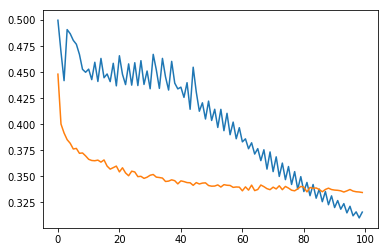

In [4]:
dnn.train(X, epochs=100, lr=3e-4)

Loss: 4.255	Acc: 9.33
Loss: 4.05	Acc: 12.678
Loss: 3.835	Acc: 18.376
Loss: 3.574	Acc: 23.006
Loss: 3.27	Acc: 31.553
Loss: 2.954	Acc: 41.168
Loss: 2.662	Acc: 50.214
Loss: 2.408	Acc: 54.701
Loss: 2.196	Acc: 58.974
Loss: 2.019	Acc: 62.251
Loss: 1.866	Acc: 64.672
Loss: 1.729	Acc: 68.02
Loss: 1.604	Acc: 70.798
Loss: 1.489	Acc: 72.863
Loss: 1.383	Acc: 75.356
Loss: 1.285	Acc: 77.208
Loss: 1.194	Acc: 78.989
Loss: 1.109	Acc: 81.268
Loss: 1.031	Acc: 83.12
Loss: 0.958	Acc: 84.473
Loss: 0.891	Acc: 85.897
Loss: 0.829	Acc: 87.037
Loss: 0.772	Acc: 88.177
Loss: 0.721	Acc: 89.459
Loss: 0.675	Acc: 90.1
Loss: 0.633	Acc: 91.168
Loss: 0.595	Acc: 91.809
Loss: 0.56	Acc: 92.806
Loss: 0.528	Acc: 93.02
Loss: 0.497	Acc: 93.162
Loss: 0.469	Acc: 93.661
Loss: 0.443	Acc: 93.875
Loss: 0.418	Acc: 94.302
Loss: 0.395	Acc: 94.444
Loss: 0.373	Acc: 94.658
Loss: 0.353	Acc: 94.729
Loss: 0.335	Acc: 94.872
Loss: 0.317	Acc: 95.442
Loss: 0.301	Acc: 95.798
Loss: 0.286	Acc: 95.798
Loss: 0.272	Acc: 96.368
Loss: 0.26	Acc: 96.51
Loss

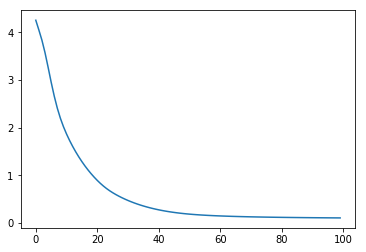

In [5]:
dnn.train_supervised(X, Y, epochs=100, batch_size=8, lr=10)

# Create image

In [6]:
noise = np.random.normal(size=(1, np.prod(input_shape)))
output = noise
n_iter = 40

for _ in range(n_iter):
    output = dnn.backward(dnn.forward(output))

img = np.squeeze(output.reshape(input_shape))

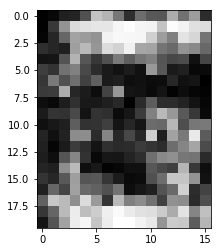

In [7]:
show_img(img)

# Visualization (classification)

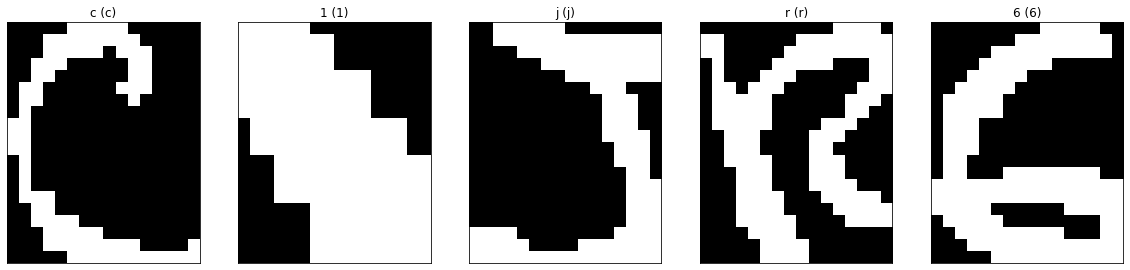

In [8]:
n_images = 5

# Sample images
sample_idx = np.random.choice(X.shape[0], n_images)
x_sample = X[sample_idx]
y_sample = Y[sample_idx]

# Run prediction
y_hat = dnn.forward_full(x_sample)

# Visualize
plt.figure(figsize=(20, 10))
for i in range(n_images):
    ax = plt.subplot(1, n_images, i+1)
    
    plt.imshow(x_sample[i].reshape(input_shape), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"{idx2char(np.argmax(y_hat[i]))} ({idx2char(np.argmax(y_sample[i]))})")